In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

bio_files = glob.glob("../data/*.csv")
df = pd.concat((pd.read_csv(f) for f in bio_files), ignore_index=True)

df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year_month"] = df["date"].dt.to_period("M")


In [2]:
df["total_stress"] = df["demo_age_17_"] + df["bio_age_17_"]


In [3]:
states = ["Uttar Pradesh", "Maharashtra"]


In [4]:
monthly = df[df["state"].isin(states)].groupby(
    ["state", "year_month"]
)["total_stress"].sum().reset_index()

monthly["time"] = range(len(monthly))


In [5]:
forecast_results = {}

for state in states:
    s = monthly[monthly["state"] == state]

    X = s[["time"]]
    y = s["total_stress"]

    model = LinearRegression()
    model.fit(X, y)

    future_time = [[s["time"].max() + i] for i in range(1, 7)]
    forecast = model.predict(future_time)

    forecast_results[state] = forecast


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

bio_files = glob.glob("../data/*.csv")
df = pd.concat((pd.read_csv(f) for f in bio_files), ignore_index=True)

df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year_month"] = df["date"].dt.to_period("M")


In [7]:
df["total_stress"] = df["demo_age_17_"] + df["bio_age_17_"]


In [8]:
states = ["Uttar Pradesh", "Maharashtra"]


In [9]:
monthly = df[df["state"].isin(states)].groupby(
    ["state", "year_month"]
)["total_stress"].sum().reset_index()

monthly["time"] = range(len(monthly))


In [10]:
forecast_results = {}

for state in states:
    s = monthly[monthly["state"] == state]

    X = s[["time"]]
    y = s["total_stress"]

    model = LinearRegression()
    model.fit(X, y)

    future_time = pd.DataFrame({"time": [s["time"].max() + i for i in range(1,7)]})
    forecast = model.predict(future_time)

    forecast_results[state] = forecast


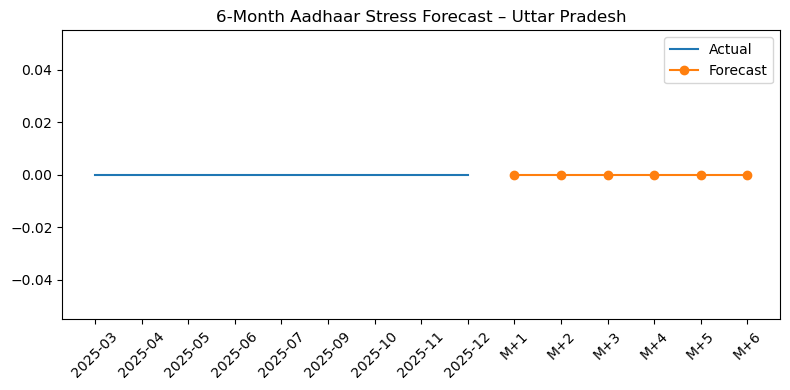

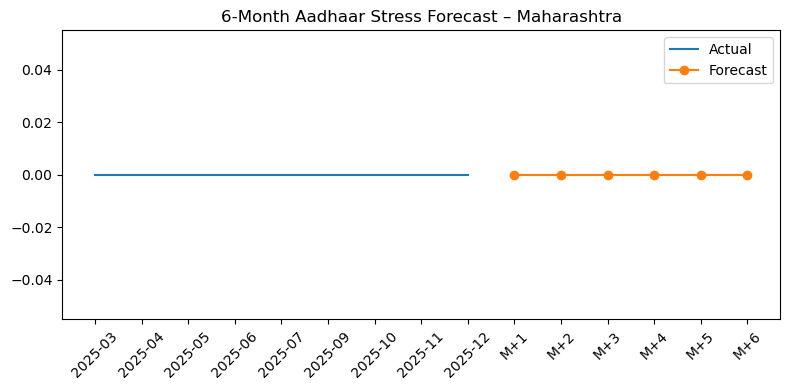

In [11]:
for state in states:
    s = monthly[monthly["state"] == state]

    plt.figure(figsize=(8,4))
    plt.plot(s["year_month"].astype(str), s["total_stress"], label="Actual")

    future_months = ["M+"+str(i) for i in range(1,7)]
    plt.plot(future_months, forecast_results[state], marker="o", label="Forecast")

    plt.title(f"6-Month Aadhaar Stress Forecast – {state}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

bio_files = glob.glob("../data/*.csv")
df = pd.concat((pd.read_csv(f) for f in bio_files), ignore_index=True)

# Compute total stress
df["total_stress"] = df["demo_age_17_"] + df["bio_age_17_"]

# State-level stress
state_stress = df.groupby("state")[["demo_age_17_", "bio_age_17_", "total_stress"]].sum()

# Pick top states
states = ["Uttar Pradesh", "Maharashtra"]
state_stress = state_stress.loc[states]


In [13]:
projection = state_stress.copy()

projection["Baseline"] = projection["total_stress"]
projection["High Migration"] = projection["demo_age_17_"] * 1.2 + projection["bio_age_17_"]
projection["System Stress"] = projection["demo_age_17_"] + projection["bio_age_17_"] * 1.25


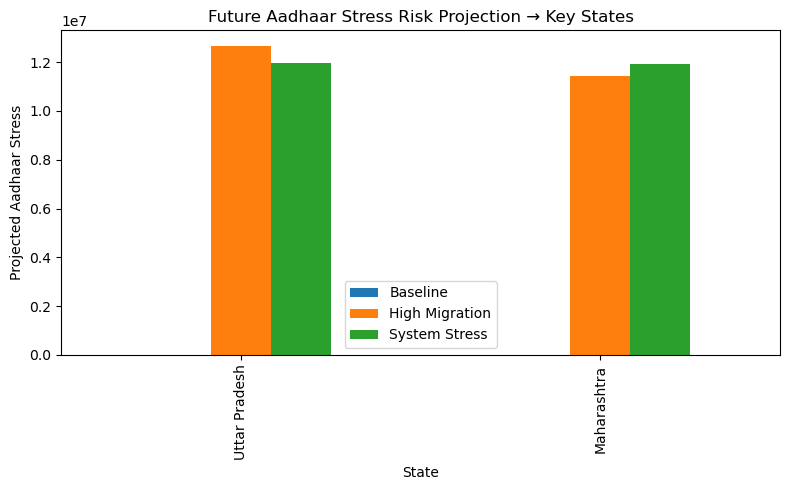

In [14]:
projection[["Baseline","High Migration","System Stress"]].plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Future Aadhaar Stress Risk Projection → Key States")
plt.ylabel("Projected Aadhaar Stress")
plt.xlabel("State")
plt.tight_layout()
plt.show()


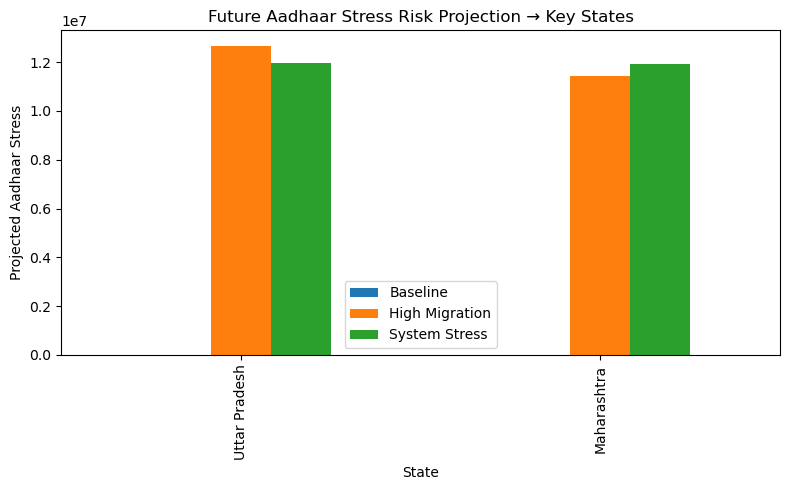

In [15]:
projection[["Baseline","High Migration","System Stress"]].plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Future Aadhaar Stress Risk Projection → Key States")
plt.ylabel("Projected Aadhaar Stress")
plt.xlabel("State")

# SAVE the figure
plt.tight_layout()
plt.savefig("../outputs/future_stress_projection.png", dpi=300)

plt.show()
